# ACIS Exposure map 


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## Download

In [2]:
/bin/rm -rf 11823
download_chandra_obsid 11823 --exclude=vvref,osol,eph1


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      157 Mb  ####################            2 s  69096.3 kb/s
  evt2     fits       61 Mb  ####################          < 1 s  81356.5 kb/s
  asol     fits       13 Mb  ####################          < 1 s  78483.8 kb/s
  mtl      fits        3 Mb  ####################          < 1 s  53701.4 kb/s
  stat     fits        2 Mb  ####################          < 1 s  30810.7 kb/s
  aqual    fits      972 Kb  ####################          < 1 s  13347.1 kb/s
  cntr_img jpg       476 Kb  ####################          < 1 s  19217.7 kb/s
  bias     fits      441 Kb  ####################          < 1 s  12211.9 kb/s
  bias     fits      438 Kb  ####################          < 1 s  23548.0 kb/s
  bias     fits      436 Kb  ####################          < 1 s  13438.7 kb/s
  bias     fits      431 Kb  ####################    

In [3]:
/bin/rm -rf CALDB
mkdir -p CALDB
download_obsid_caldb 11823 outdir=`pwd`/CALDB --debug

download_obsid_caldb
          infile = 11823
          outdir = /proj/sds/Staff/kjg/Threads/expmap_acis_multi/CALDB
      background = no
         missing = no
         clobber = no
         verbose = 1
            mode = ql

Retrieving files for CALDB_VER = 4.9.6
Retrieving CALDB index files
Processing infile=11823/primary/acisf11823N003_evt2.fits.gz
Retrieving CALDB data files
    Filename:                               0------------------1
    telD1999-07-23geomN0006.fits            ####################
    telD1999-07-23aimptsN0002.fits          ####################
    telD1999-07-23tdetN0001.fits            ####################
    telD1999-07-23skyN0002.fits             ####################
    telD1999-07-23sgeomN0001.fits           ####################
    hrmaD1996-12-20axeffaN0008.fits         ####################
    hrmaD1996-12-20vignetN0003.fits         ####################
    acisD1997-04-17qeN0006.fits             ####################
    acisD2010-02-01qeuN0007.fits

In [4]:
export CALDB=`pwd`/CALDB
export CALDBCONFIG=`pwd`/CALDB/software/tools/caldb.config
export CALDBALIAS=none

In [5]:
/bin/rm -rf repro
chandra_repro 11823 out=./repro


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/expmap_acis_multi/11823'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/expmap_acis_multi/repro/acisf11823_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/expmap_acis_multi/repro/acisf11823_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Sta

## Run `fluximage`

In [6]:
fluximage repro/ flux/ clob+

Running fluximage
Version: 23 February 2021

Found repro/acisf11823_repro_evt2.fits
Using event file repro/acisf11823_repro_evt2.fits
Using CSC ACIS broad science energy band.
Aspect solution repro/pcadf11823_001N001_asol1.fits found.
Bad-pixel file repro/acisf11823_repro_bpix1.fits found.
Mask file repro/acisf11823_001N003_msk1.fits found.

The output images will have 298 by 298 pixels, pixel size of 3.936 arcsec,
    and cover x=2872.5:5256.5:8,y=2848.5:5232.5:8.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 11823
Creating 4 instrument maps for obsid 11823
Creating 4 exposure maps for obsid 11823
Combining 4 exposure maps for obsid 11823
Thresholding data for obsid 11823
Exposure-correcting image for obsid 11823

The following files were created:

 The clipped counts image is:
     flux/broad_thresh.img

 The clipped exposure map is:
     flux/broad_thresh.expmap

 The exposure-corrected image is:
     flux/broad_flux.img



### 3 Color

In [7]:
fluximage repro/ flux_rgb/ bands=csc clob+

Running fluximage
Version: 23 February 2021

Found repro/acisf11823_repro_evt2.fits
Using event file repro/acisf11823_repro_evt2.fits
Using CSC ACIS soft science energy band.
Using CSC ACIS medium science energy band.
Using CSC ACIS hard science energy band.
Aspect solution repro/pcadf11823_001N001_asol1.fits found.
Bad-pixel file repro/acisf11823_repro_bpix1.fits found.
Mask file repro/acisf11823_001N003_msk1.fits found.

The output images will have 298 by 298 pixels, pixel size of 3.936 arcsec,
    and cover x=2872.5:5256.5:8,y=2848.5:5232.5:8.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 11823
Creating 12 instrument maps for obsid 11823
Creating 12 exposure maps for obsid 11823
Combining 4 exposure maps for 3 bands (obsid 11823)
Thresholding data for obsid 11823
Exposure-correcting 3 images for obsid 11823

The following files were created:

 The clipped counts images are:
     flux_rgb/soft_thresh.img
     flux_rgb/medium_thresh.img
     flux_r

[1] 10946
[1]+  Done                    ds9 -rgb -red flux_rgb/soft_flux.img -green flux_rgb/medium_flux.img -blue flux_rgb/hard_flux.img -rgb lock scale yes -scale mode 99.5 -zoom 2 -saveimage ds9_01.png


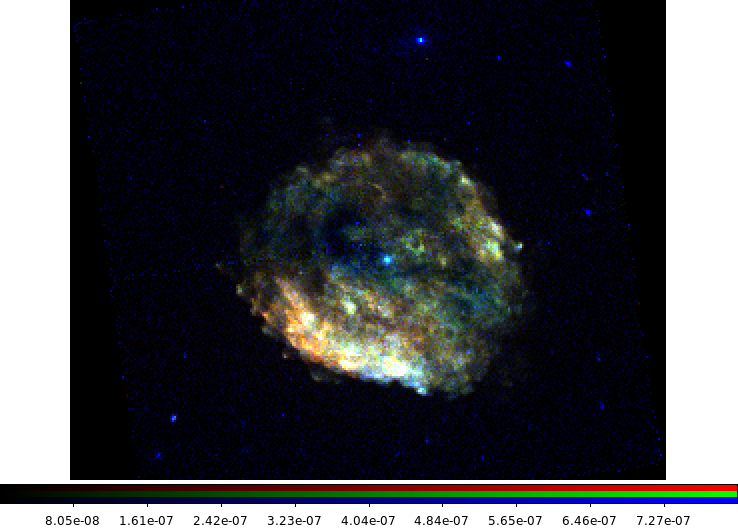

In [8]:
ds9 -rgb -red flux_rgb/soft_flux.img \
         -green flux_rgb/medium_flux.img \
         -blue flux_rgb/hard_flux.img \
         -rgb lock scale yes -scale mode 99.5 -zoom 2 \
         -saveimage ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

---

## Step by Step

### 2. Create an Image

In [9]:
dmcopy "repro/acisf11823_repro_evt2.fits[energy=500:7000]" 11823.evt2 cl+

In [10]:
dmcopy "11823.evt2[sky=region(repro/acisf11823_repro_fov1.fits)][bin sky=8]" 11823.i0123.img cl+
get_sky_limits 11823.i0123.img 

Running: get_sky_limits
  version: 07 October 2016
Checking binning of image: 11823.i0123.img
  Image has 298 x 298 pixels
  Pixel size is 8.0 by 8.0
  Lower left (0.5,0.5) corner is x,y= 2872.7, 2850.5
  Upper right (298.5,298.5) corner is x,y= 5256.7, 5234.5
  DM filter is:
    x=2872.7:5256.7:#298,y=2850.5:5234.5:#298
  mkexpmap xygrid value is:
    2872.7:5256.7:#298,2850.5:5234.5:#298


### 3. Compute Exp Map

#### Which chips are on?


In [11]:
dmkeypar 11823.evt2 detnam echo+

ACIS-0123


In [12]:
ccds="0 1 2 3"

#### What is spectrum of source?

In [13]:
cat << EOM > obj.reg
# Region file format: CIAO version 1.0
circle(4142.9,3969.4,8)
EOM

In [14]:
dmextract "11823.evt2[sky=region(obj.reg)][bin energy=500:7000:50]" \
  11823.energy.fits op=generic clob+

In [15]:
dmstat "11823.energy.fits[cols counts]" sigma-

COUNTS[count]
    min:	1 	      @:	3 
    max:	268 	      @:	25 
   mean:	69.423076923 
    sum:	9025 
   good:	130 
   null:	0 



In [16]:
dmlist "11823.energy.fits[counts>250][cols energy,counts]" data,clean

#  ENERGY               COUNTS
               1675.0        253
               1725.0        268
               1775.0        258


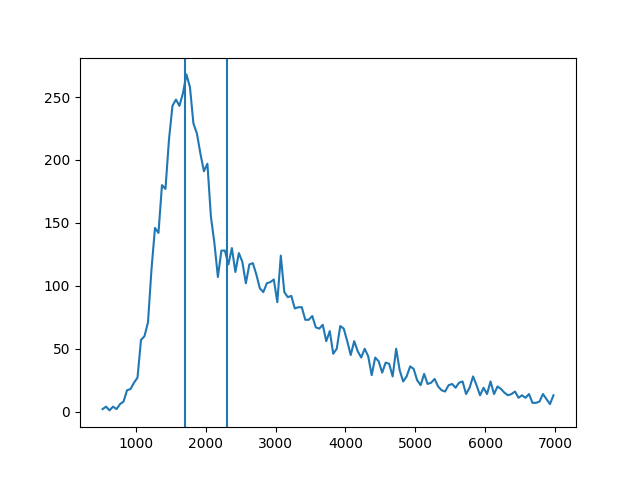

In [17]:
cat << EOM > c1.py
import matplotlib.pyplot as plt
from pycrates import read_file

tab = read_file("11823.energy.fits")
x = tab.get_column("energy").values
y = tab.get_column("counts").values

plt.plot(x,y)
plt.axvline(1.7*1000)
plt.axvline(2.3*1000)
plt.savefig("chips_01.png")
EOM

python c1.py
display < chips_01.png

We'll go ahead and use broad band 2.3 keV value.

### Compute Aspect Histograms


In [18]:
cat repro/acisf11823_asol1.lis

/proj/sds/Staff/kjg/Threads/expmap_acis_multi/11823/primary/pcadf11823_001N001_asol1.fits


In [19]:
pset asphist infile=@-repro/acisf11823_asol1.lis
pset asphist res_xy=1.9 mode=h

for d in ${ccds}
do
  asphist outfile=${d}.asphist evtfile="11823.evt2[ccd_id=${d}]" clob+ mode=h
done

/bin/ls -1 *.asphist

0.asphist
1.asphist
2.asphist
3.asphist


In [20]:
acis_set_ardlib repro/acisf11823_repro_bpix1.fits abs-

Updated ardlib parameter file: /proj/sds/Staff/kjg/Threads/expmap_acis_multi/param/ardlib.par
  AXAF_ACIS0_BADPIX_FILE -> repro/acisf11823_repro_bpix1.fits[BADPIX0]
  AXAF_ACIS1_BADPIX_FILE -> repro/acisf11823_repro_bpix1.fits[BADPIX1]
  AXAF_ACIS2_BADPIX_FILE -> repro/acisf11823_repro_bpix1.fits[BADPIX2]
  AXAF_ACIS3_BADPIX_FILE -> repro/acisf11823_repro_bpix1.fits[BADPIX3]
  AXAF_ACIS4_BADPIX_FILE -> CALDB
  AXAF_ACIS5_BADPIX_FILE -> CALDB
  AXAF_ACIS6_BADPIX_FILE -> CALDB
  AXAF_ACIS7_BADPIX_FILE -> CALDB
  AXAF_ACIS8_BADPIX_FILE -> CALDB
  AXAF_ACIS9_BADPIX_FILE -> CALDB


In [21]:
pget ardlib AXAF_ACIS3_BADPIX_FILE

repro/acisf11823_repro_bpix1.fits[BADPIX3]


In [22]:
pset mkinstmap pixelgrid="1:1024:#1024,1:1024:#1024"
pset mkinstmap obsfile=11823.evt2 
pset mkinstmap maskfile=repro/acisf11823_001N003_msk1.fits
pset mkinstmap monoenergy=2.3 mode=h
for d in  ${ccds}
do
  mkinstmap detsubsys=ACIS-${d} outfile=${d}.instmap clob+
done

/bin/ls -1 ?.instmap

0.instmap
1.instmap
2.instmap
3.instmap


## Calc Exposure Maps

In [23]:
get_sky_limits 11823.i0123.img 

Running: get_sky_limits
  version: 07 October 2016
Checking binning of image: 11823.i0123.img
  Image has 298 x 298 pixels
  Pixel size is 8.0 by 8.0
  Lower left (0.5,0.5) corner is x,y= 2872.7, 2850.5
  Upper right (298.5,298.5) corner is x,y= 5256.7, 5234.5
  DM filter is:
    x=2872.7:5256.7:#298,y=2850.5:5234.5:#298
  mkexpmap xygrid value is:
    2872.7:5256.7:#298,2850.5:5234.5:#298


In [24]:
pset mkexpmap xygrid=")get_sky_limits.xygrid"

In [25]:
pset mkexpmap normalize=no mode=h
for d in ${ccds}
do
  mkexpmap instmapfile=${d}.instmap \
           outfile=${d}.bin8.expmap \
           asphistfile=${d}.asphist clob+ 
done


## Co-add expmaps

In [26]:
ls -1 ?.bin8.expmap

0.bin8.expmap
1.bin8.expmap
2.bin8.expmap
3.bin8.expmap


In [27]:
dmimgcalc '?.bin8.expmap' infile2= out=bin8.expmap \
  op="imgout=img1+img2+img3+img4" clob+

In [28]:
dmkeypar bin8.expmap detnam echo+

Merged


In [29]:
dmhedit bin8.expmap file= op=add key=DETNAM value=ACIS-0123
dmkeypar bin8.expmap detnam echo+

ACIS-0123


[1] 11170
[1]+  Done                    ds9 bin8.expmap -cmap b -scale pow -zoom 2 -saveimage png full_expmap.png


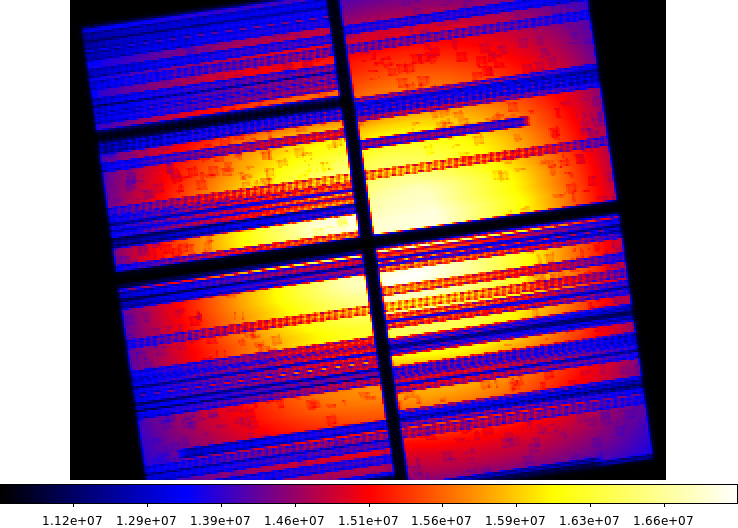

In [30]:
ds9 bin8.expmap -cmap b -scale pow -zoom 2 -saveimage png full_expmap.png &
sleep 10
xpaset -p ds9 quit

display < full_expmap.png

## _flux_ image

Normalize counts by exposure


### Apply threshold to expmap

to avoid edge problems.


In [31]:
dmimgthresh 11823.i0123.img 11823.i0123.thresh.img expfile=bin8.expmap cut=1.5% cl+
dmimgthresh bin8.expmap bin8.thresh.expmap cut=1.5% cl+


### Divide

In [32]:
dmimgcalc 11823.i0123.thresh.img bin8.thresh.expmap 11823.i0123.norm div clob+

[1] 11595
[1]+  Done                    ds9 11823.i0123.norm -scale log -cmap hsv -zoom 2 -saveimage png expcorr.png


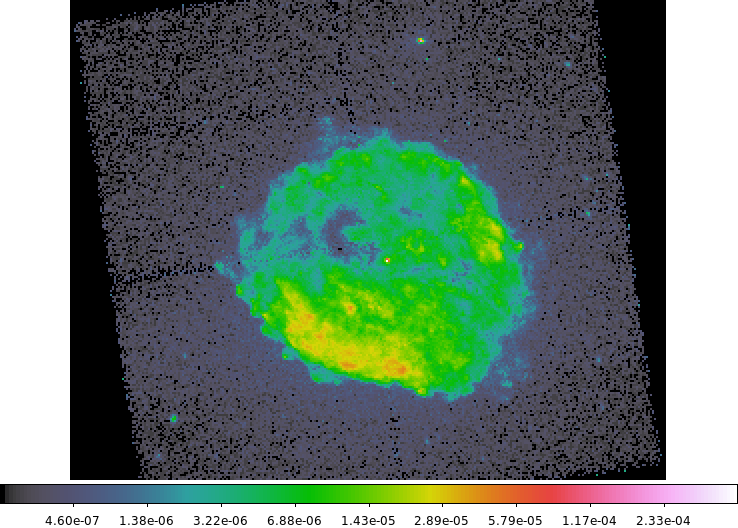

In [33]:
ds9 11823.i0123.norm -scale log -cmap hsv -zoom 2 -saveimage png expcorr.png &
sleep 10
xpaset -p ds9 quit

display < expcorr.png

In [34]:
dmimgcalc infile=11823.i0123.thresh.img,bin8.thresh.expmap out=11823.i0123.norm2 \
          infile2= op="imgout=img1/img2" cl+

[1] 11696
[1]+  Done                    ds9 11823.i0123.norm2 -scale log -cmap hsv -zoom 2 -prefs nancolor red -saveimage png expcorr_nan.png


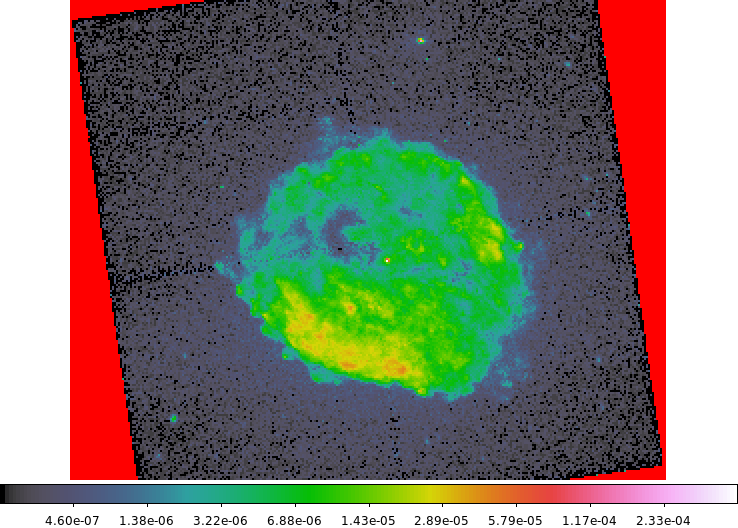

In [35]:
ds9 11823.i0123.norm2 -scale log -cmap hsv -zoom 2 -prefs nancolor red -saveimage png expcorr_nan.png &
sleep 10
xpaset -p ds9 quit

display < expcorr_nan.png

In [36]:
dmstat 11823.i0123.norm\* centroid-

File=11823.i0123.norm
11823.i0123.norm
    min:	0 	      @:	( 2876.7008031 2854.5276876 )
    max:	0.00046398030827 	      @:	( 4140.7008031 3966.5276876 )
   mean:	1.3657813474e-06 
  sigma:	4.166012969e-06 
    sum:	0.12128684678 
   good:	88804 
   null:	0 
File=11823.i0123.norm2
11823.i0123.norm2
    min:	0 	      @:	( 3180.7008031 2862.5276876 )
    max:	0.00046398030827 	      @:	( 4140.7008031 3966.5276876 )
   mean:	1.7681844881e-06 
  sigma:	4.6645126503e-06 
    sum:	0.12128684678 
   good:	68594 
   null:	20210 


## Compute Source Flux

In [37]:
cat obj.reg

# Region file format: CIAO version 1.0
circle(4142.9,3969.4,8)


In [38]:
dmstat "11823.i0123.norm[sky=region(obj.reg)]" centroid- | grep sum

    sum:	0.00064174400541 


In [39]:
dmextract "11823.i0123.norm[bin sky=@obj.reg]" sources.flux op=generic clo+
dmlist "sources.flux[cols counts]" data,clean

#  COUNTS
      0.0006417440054


# Cleanup


In [40]:
/bin/rm -rf 11823 CALDB/ repro/
mv -fv flux/* flux_rgb/* ./
rmdir flux flux_rgb


'flux/broad_flux.img' -> './broad_flux.img'
'flux/broad_thresh.expmap' -> './broad_thresh.expmap'
'flux/broad_thresh.img' -> './broad_thresh.img'
'flux_rgb/hard_flux.img' -> './hard_flux.img'
'flux_rgb/hard_thresh.expmap' -> './hard_thresh.expmap'
'flux_rgb/hard_thresh.img' -> './hard_thresh.img'
'flux_rgb/medium_flux.img' -> './medium_flux.img'
'flux_rgb/medium_thresh.expmap' -> './medium_thresh.expmap'
'flux_rgb/medium_thresh.img' -> './medium_thresh.img'
'flux_rgb/soft_flux.img' -> './soft_flux.img'
'flux_rgb/soft_thresh.expmap' -> './soft_thresh.expmap'
'flux_rgb/soft_thresh.img' -> './soft_thresh.img'
